In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Import and Overview

In [2]:
#read data
df = pd.read_csv('ecomm_summary.csv', delimiter=';')

df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_Id       212 non-null    int64  
 1   Customer_Name     212 non-null    object 
 2   order_date        212 non-null    object 
 3   quantity          212 non-null    int64  
 4   product_id        212 non-null    int64  
 5   product_category  212 non-null    object 
 6   product_price     212 non-null    float64
 7   product_name      212 non-null    object 
 8   order_id          212 non-null    int64  
 9   brand             212 non-null    object 
 10  Sales             212 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 18.3+ KB


In [4]:
df.describe()

,Customer_Id,quantity,product_id,product_price,order_id,Sales
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,533.688679,2.405660,220.504717,6544.245283,142146.292453,8325.212264
std,373.253033,1.133533,198.048094,2934.959553,1427.425269,3751.901335
min,1.000000,1.000000,1.000000,1150.000000,139374.000000,2184.000000
25%,277.750000,1.000000,78.750000,4500.000000,140980.000000,5850.000000
50%,406.500000,2.000000,126.500000,6500.000000,142213.000000,8450.000000
75%,793.500000,3.000000,345.000000,10000.000000,143352.000000,13000.000000
max,1453.000000,4.000000,660.000000,10500.000000,144449.000000,13650.000000


## Data Cleaning

In [101]:
df.isnull().sum()

Customer_Id         0
Customer_Name       0
order_date          0
quantity            0
product_id          0
product_category    0
product_price       0
product_name        0
order_id            0
brand               0
Sales               0
total_sales         0
year_quarter        0
monthly_sales       0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
207    False
208    False
209    False
210    False
211    False
Length: 212, dtype: bool

In [ ]:
#Values in quntity and product price have to be greater than 0 
df = df[(df['quantity'] > 0) & (df['product_price'] > 0)]

## Exploratory Sales Analysis (EDA)

### Visualizations

#### Sales by Product category and product name

A bar plot of sales by product category and sales by product name will help understand which products generate the most revenue. 

In [9]:
#product sals overview
df['total_sales']=df['quantity']*df['product_price']

In [10]:
df['total_sales'].describe()

count      212.000000
mean     15691.037736
std      10794.473347
min       1680.000000
25%       6720.000000
50%      13000.000000
75%      20000.000000
max      42000.000000
Name: total_sales, dtype: float64

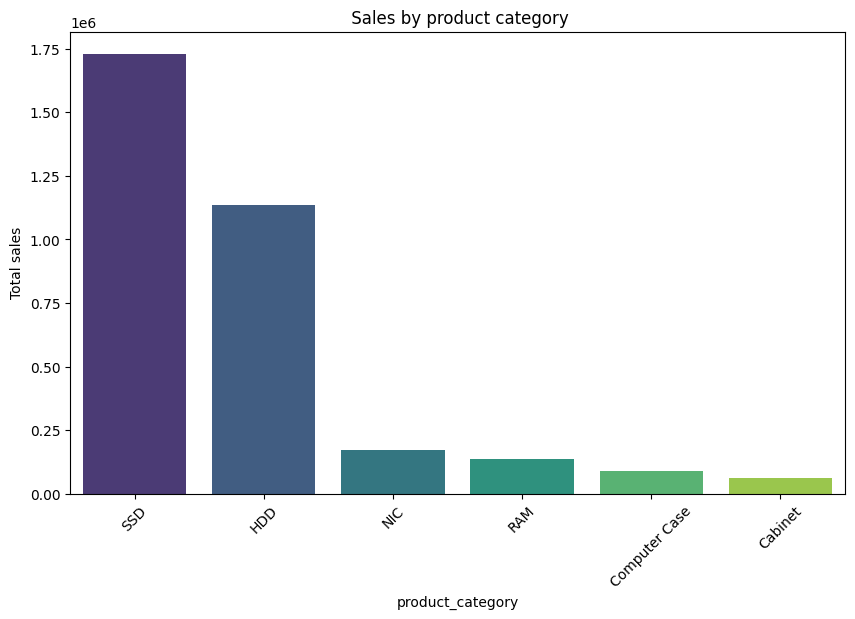

In [11]:
#Sales by product category

sales_by_category = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, hue=sales_by_category.index, palette='viridis')
plt.title(' Sales by product category')
plt.xticks(rotation=45)
plt.ylabel('Total sales')
plt.show()

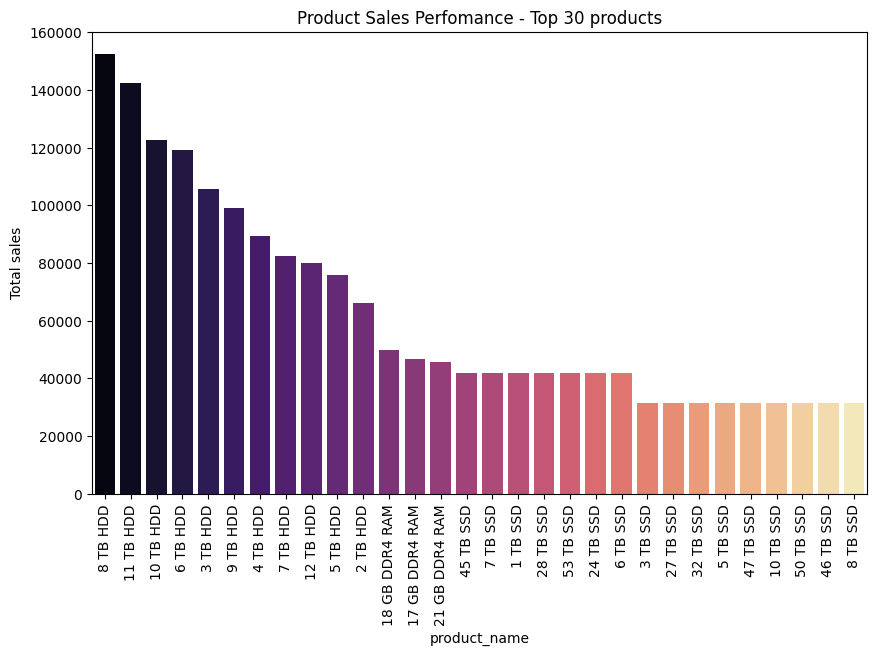

In [91]:
#Sales by product name

sales_by_name = df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_name.index, y=sales_by_name.values, hue=sales_by_name.index, palette='magma')
plt.title('Product Sales Perfomance - Top 30 products')
plt.xticks(rotation=90)
plt.ylabel('Total sales')
plt.show()

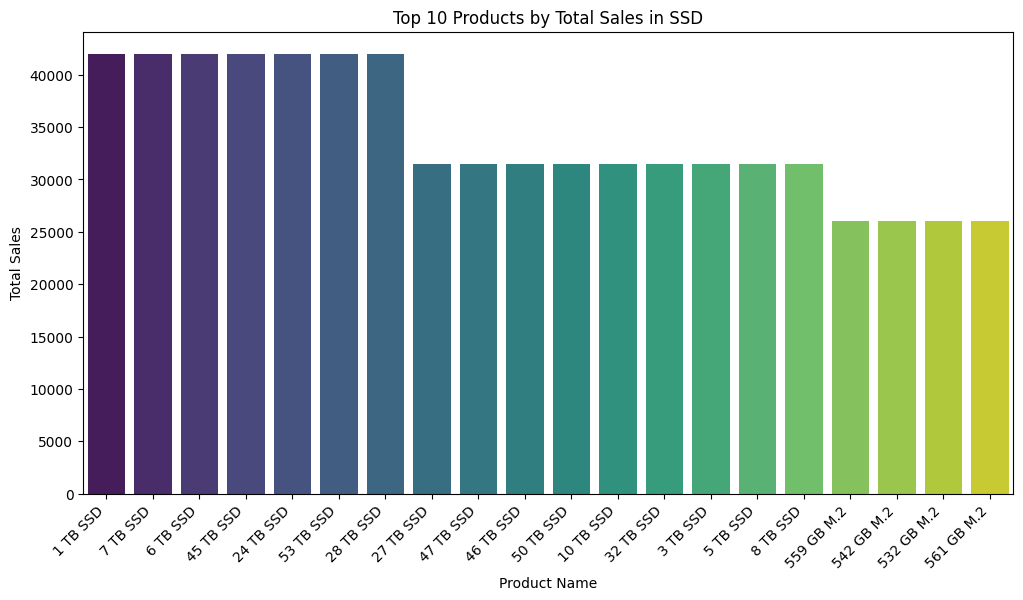

In [23]:
#Looking to see if the top productts are in SSD since SSD has the highest sales category
category_name = 'SSD'
category_df = df[df['product_category'] == category_name]
sales_by_name_in_category = category_df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False)
top_10_sales_by_name_in_category = sales_by_name_in_category.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_by_name_in_category.index, y=top_10_sales_by_name_in_category.values, hue=top_10_sales_by_name_in_category.index, palette='viridis')
plt.title(f'Top 10 Products by Total Sales in {category_name}')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

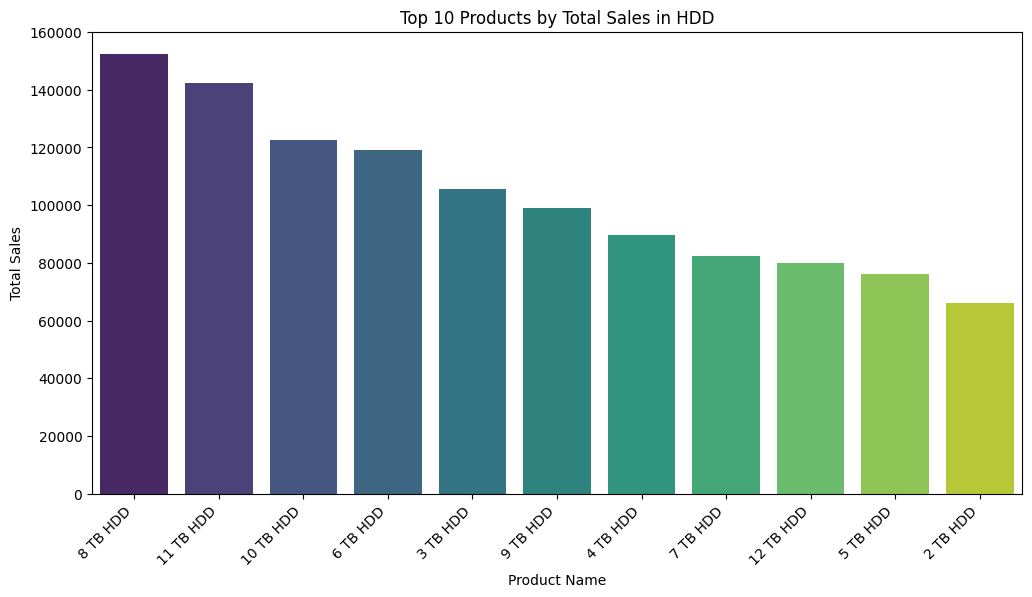

In [24]:
category_name = 'HDD'
category_df = df[df['product_category'] == category_name]
sales_by_name_in_category = category_df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False)
top_10_sales_by_name_in_category = sales_by_name_in_category.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_by_name_in_category.index, y=top_10_sales_by_name_in_category.values, hue=top_10_sales_by_name_in_category.index, palette='viridis')
plt.title(f'Top 10 Products by Total Sales in {category_name}')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that HDD has the highest sales by far compared to SSD, but upon graphing the sales by products, it's visible that HDD products are actually selling a lot more than SSD products. The only way this could be possible, is if the number of products in SSD and HDD vary greatly, with SSD having a much longer list of products, increasing it's total sales, though per product they do not sell well.

In [25]:
product_count_by_category = df.groupby('product_category')['product_name'].nunique()
print(product_count_by_category)

product_category
Cabinet           12
Computer Case      8
HDD               11
NIC               12
RAM               12
SSD              106
Name: product_name, dtype: int64


We can now explain why SSD had much higher category sales than HDD, though HDD products sold extremely well. 

#### Sales over time 

The goal is to examine how sales fluctuate over time by analyzing order dates.

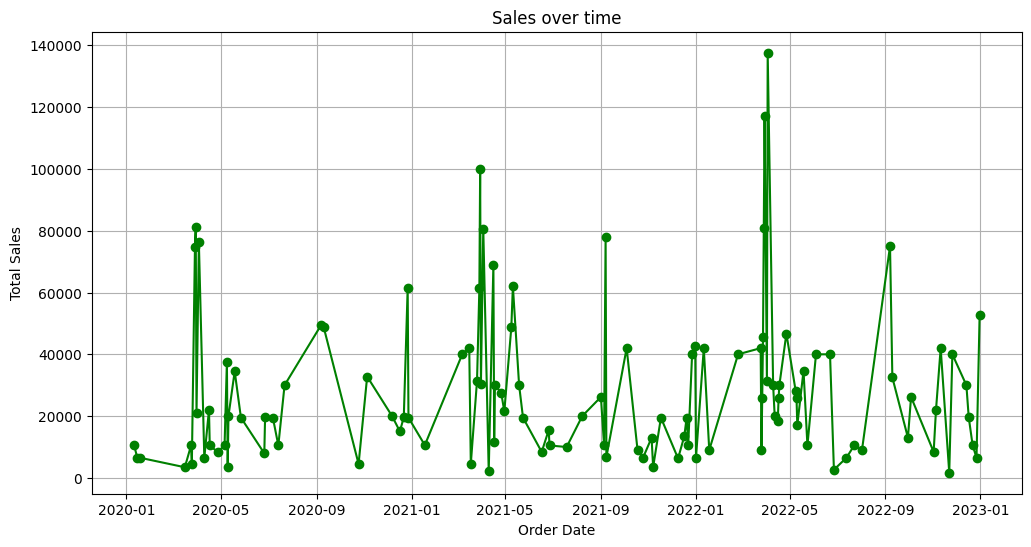

In [26]:
#make sure order date is in date and time 
df['order_date'] = pd.to_datetime(df['order_date'])

sales_by_date = df.groupby(df['order_date'].dt.date)['total_sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', color='g')
plt.title('Sales over time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

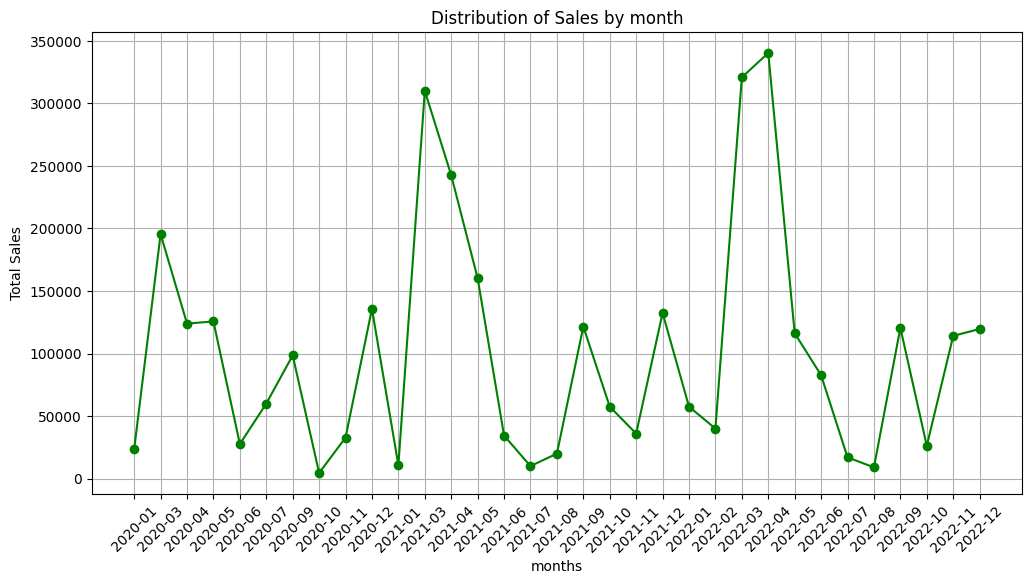

In [42]:
#monthly analysis
df['monthly_sales']=df['order_date'].dt.to_period('M')

sales_by_month = df.groupby('monthly_sales')['total_sales'].sum()

#highest and lowest sales by dates
highest_sales_date = sales_by_month.idxmax()
lowest_sales_date = sales_by_month.idxmin()
highest_sales_value = sales_by_month.max()
lowest_sales_value = sales_by_month.min()

plt.figure(figsize=(12,6))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker='o', color='g')
plt.title('Distribution of Sales by month')
plt.xlabel('months')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Based on monthly sales, it can be concluded that sales do the best early in the year, between January and March. Top sales have aso been increasing steadily of the past 3 years. 

#### Sales By Brand

Analyzing how sales vary by brand, which can help identify top performing brands.

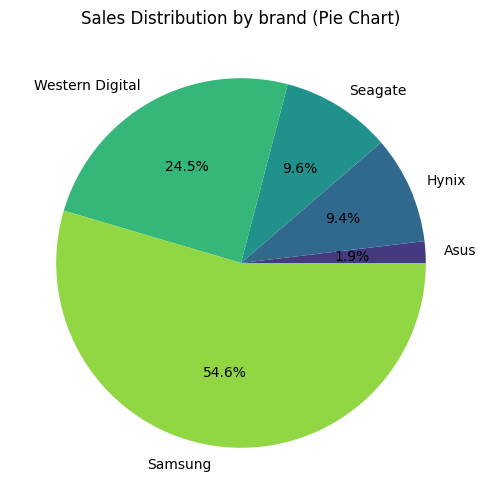

In [43]:
sales_by_brand = df.groupby('brand')['total_sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.pie(sales_by_brand, labels=sales_by_brand.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sales_by_brand)))
plt.title('Sales Distribution by brand (Pie Chart)')
plt.show()

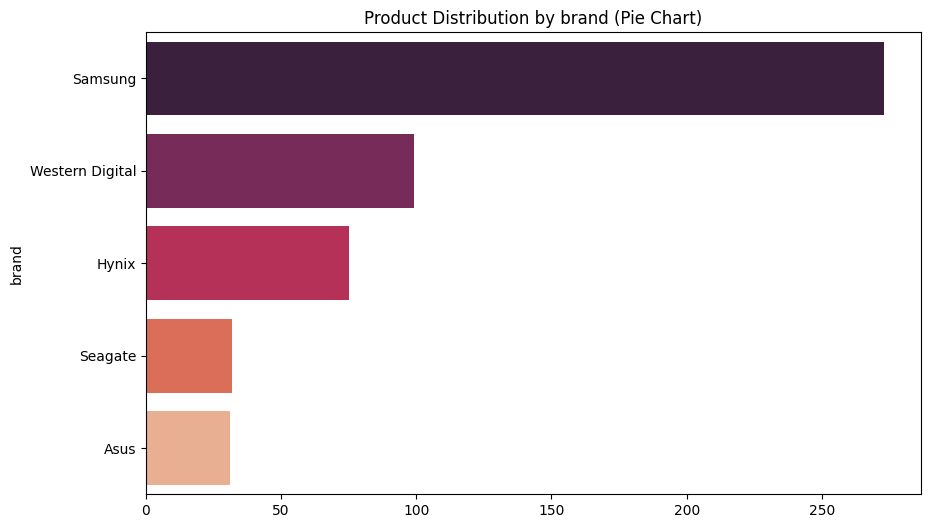

In [53]:
#products sold by brand
products_sold_by_brand = df.groupby('brand')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=products_sold_by_brand.values, y=products_sold_by_brand.index.astype(str), hue = products_sold_by_brand.index , palette = ('rocket'))
plt.title('Product Distribution by brand (Pie Chart)')
plt.show()

From the two graphs, it is noticeable that smasun owns most of the products, which can explain why their sales are more than half of the other product sales. 

####  Distribution of Order Quantities and Product Prices

Analyzing the distribution of order quantities and product prices using histograms to spot trends or potential outliers

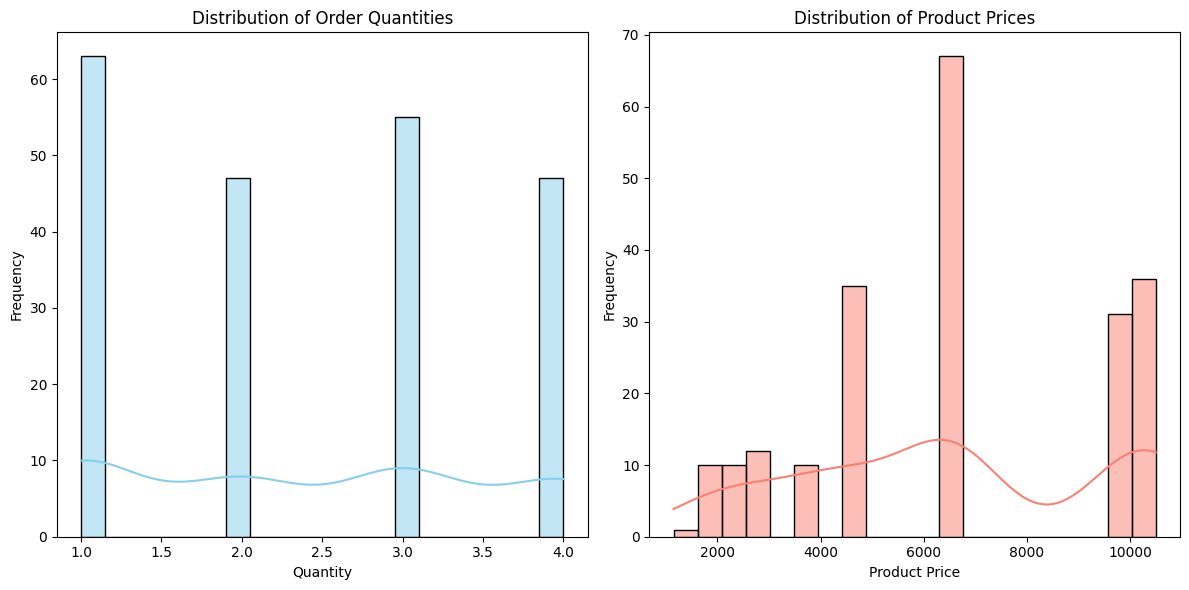

In [61]:
fig,axes = plt.subplots(1,2,figsize=(12,6))


# Distribution of quantities ordered
sns.histplot(df['quantity'], kde=True,  bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Order Quantities')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Distribution of product prices
sns.histplot(df['product_price'], kde=True, bins=20, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Product Prices')
axes[1].set_xlabel('Product Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Correlation between Sales and Other variables

Visualizing the relationship between sales and other numeric variables like quantity and product price using a heatmaps

In [63]:
df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales,total_sales,year_quarter,monthly_sales
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450,10500.0,2020-01,2020-01
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650,6500.0,2020-01,2020-01
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184,6550.0,2020-01,2020-01
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730,3450.0,2020-03,2020-03
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850,10500.0,2020-03,2020-03


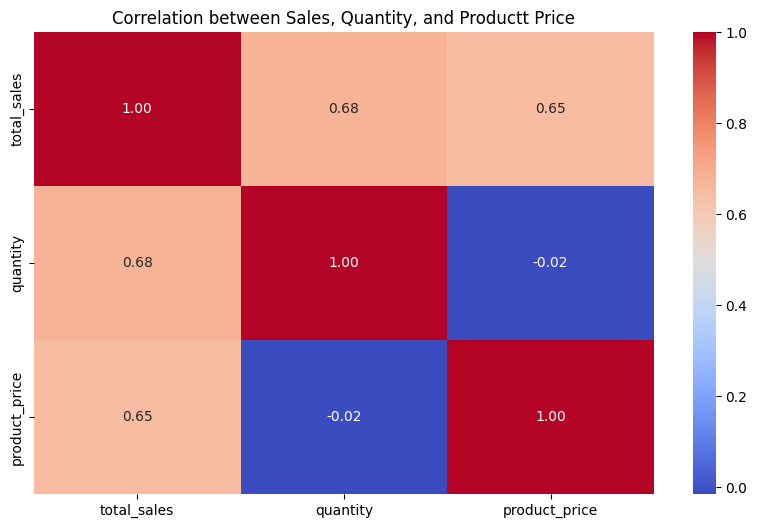

In [66]:
corr = df[['total_sales', 'quantity','product_price']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sales, Quantity, and Productt Price')
plt.show()

## Advanced Analysis

#### Top Customers By Total Sales

Identify your top customers by total sales. This is useful for targeted marketing or sales strategies.


In [68]:
df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales,total_sales,year_quarter,monthly_sales
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450,10500.0,2020-01,2020-01
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650,6500.0,2020-01,2020-01
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184,6550.0,2020-01,2020-01
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730,3450.0,2020-03,2020-03
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850,10500.0,2020-03,2020-03


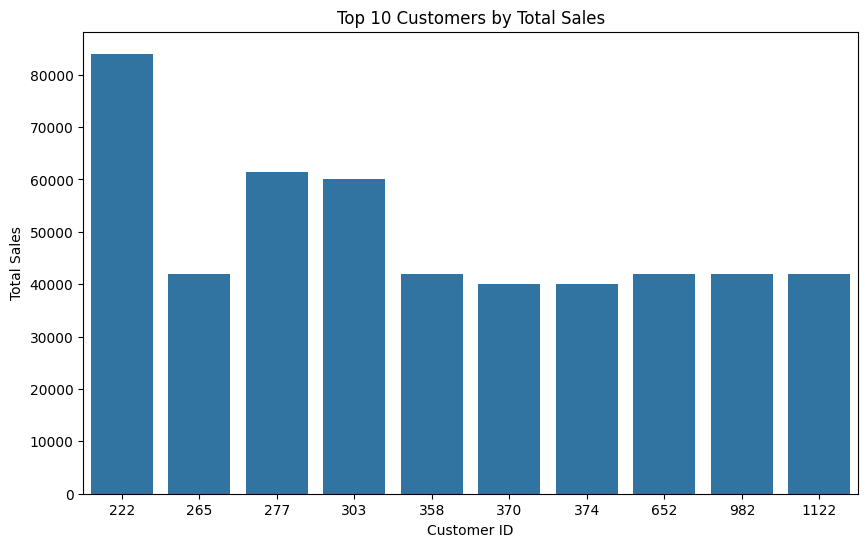

In [ ]:
# Group by customer id and calculate total sales
top_customers = df.groupby('Customer_Id')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()

In [83]:
orderd_by_customer = df.groupby('Customer_Name')['order_id'].nunique()

top_10_customers = orderd_by_customer.sort_values(ascending=False).head(10)

print(f'Top 10 customers by number of orders:{top_10_customers}')

Top 10 customers by number of orders:Customer_Name
Moinuddin Saifi          9
Bijendra                 8
Atif Siddiqui            7
Vinod Mehta              7
Rhushikesh Mane          7
Ranjeet Kumar            7
Kundan Kumar             6
Rahul Kashyap            6
Rahul Kumar Prajapati    6
Rakesh Kumar Sharma      6
Name: order_id, dtype: int64


#### Product Performance

Identifying which products are underperfoming or overperforming based on sales

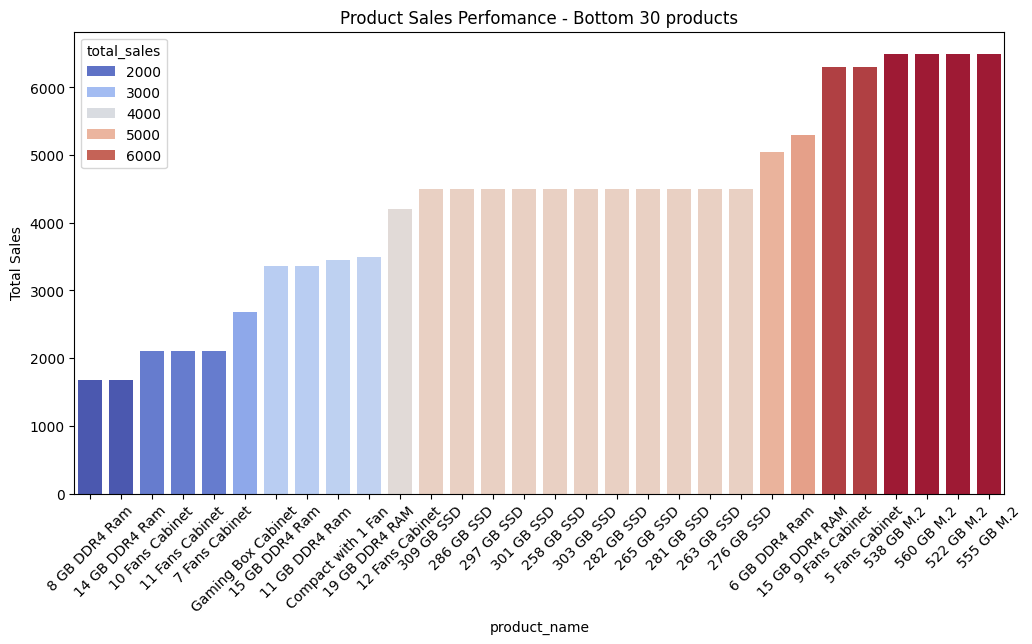

In [94]:
#Lowest Sales by product name

lowest_product_performance = df.groupby('product_name')['total_sales'].sum().sort_values(ascending=True).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_product_performance.index, y=lowest_product_performance.values, hue=lowest_product_performance, palette='coolwarm')
plt.title('Product Sales Perfomance - Bottom 30 products')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()


## Conclusion

Top selling categories  - 

Trends Over time - 

Customer insights - 

Pricing Insights - 

Product_level Analysis - 